In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
rewards = np.zeros(16)
rewards[3] = 1
rewards[2] = 0
rewards[11] = 0
rewards[10] = 0

terminal_state = 3
state_values = np.zeros(16)
alpha = 0.005
score_log = []

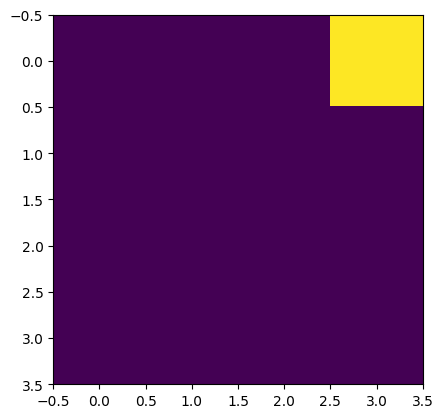

In [3]:
plt.imshow(rewards.reshape(4,4))

In [4]:
state_transition_table = np.genfromtxt("state_transitions.csv", delimiter=",").astype(int)

In [5]:
def monte_carlo_update(values, rewards, states):
    returns = []
    R = 0
    gamma = 0.9
    for i in reversed(range(len(rewards))):
        R = rewards[i] + gamma * R
        returns.insert(0, R)

    values[state_log] = values[states] + alpha*(returns - values[states])
    return values

In [6]:
def test_agent():
    state = 12
    done = False
    steps = 0
    total_rewards = 0
    states_log = []
    while (not(state == terminal_state)) and steps<30:
        states_log.append(state)
        action = np.argmax(state_values[state_transition_table[state]])
        state = state_transition_table[state, action]
        total_rewards += rewards[state]
        steps += 1
    states_log.append(state)
    return total_rewards, states_log

In [7]:
for _ in range(10000):
    state = 12
    state_log = []
    reward_log = []
    steps = 0
#     reward_log.append(rewards[state])
#     state_log.append(state)

    while (not(state == terminal_state)) and steps<30:
        reward_log.append(rewards[state])
        state_log.append(state)
        
        action = random.randint(0,3)
        state = state_transition_table[state, action]
        steps += 1
        
    reward_log.append(rewards[state])
    state_log.append(state)
    state_values = monte_carlo_update(state_values, reward_log, state_log)
    
    score_log.append(test_agent()[0])

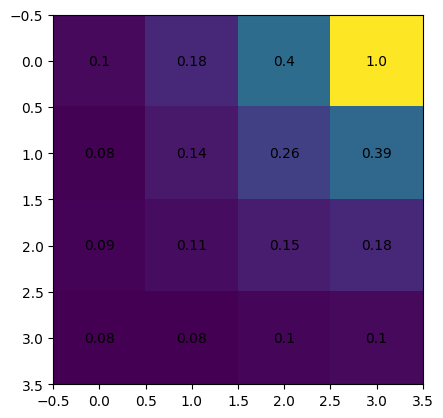

In [8]:
fig1, ax1= plt.subplots(1)
ax1.imshow(state_values.reshape(4, 4))

for (j,i), label in np.ndenumerate(state_values.reshape(4, 4).round(2)):
    ax1.text(i,j,label,ha='center',va='center')

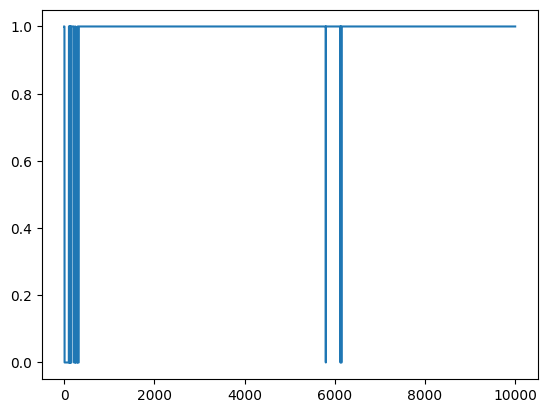

In [9]:
plt.plot(score_log)

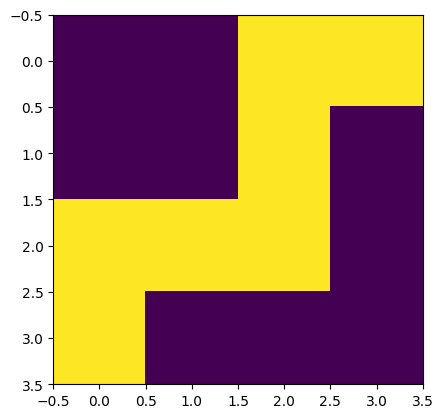

In [10]:
_, state_log = test_agent()
state_view = np.zeros(16)
state_view[state_log] = 1
plt.imshow(state_view.reshape(4,4))